In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## cleaning the dataset

In [2]:
a=pd.read_csv("C:/Users/pawan/Downloads/winequality.csv")

In [3]:
a.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


In [6]:
a.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
good                    0
color                   0
dtype: int64

## performing EDA using pandas

In [7]:
x = a.loc[:,['volatile acidity','citric acid','chlorides','sulphates','total sulfur dioxide','free sulfur dioxide','pH','alcohol','good']]
y = a.loc[:,'quality']


In [9]:
x.describe()

,volatile acidity,citric acid,chlorides,sulphates,total sulfur dioxide,free sulfur dioxide,pH,alcohol,good
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.339666,0.318633,0.056034,0.531268,115.744574,30.525319,3.218501,10.491801,0.196552
std,0.164636,0.145318,0.035034,0.148806,56.521855,17.749400,0.160787,1.192712,0.397421
min,0.080000,0.000000,0.009000,0.220000,6.000000,1.000000,2.720000,8.000000,0.000000
25%,0.230000,0.250000,0.038000,0.430000,77.000000,17.000000,3.110000,9.500000,0.000000
50%,0.290000,0.310000,0.047000,0.510000,118.000000,29.000000,3.210000,10.300000,0.000000
75%,0.400000,0.390000,0.065000,0.600000,156.000000,41.000000,3.320000,11.300000,0.000000
max,1.580000,1.660000,0.611000,2.000000,440.000000,289.000000,4.010000,14.900000,1.000000


In [10]:
y.describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

## Visualization and Correlation

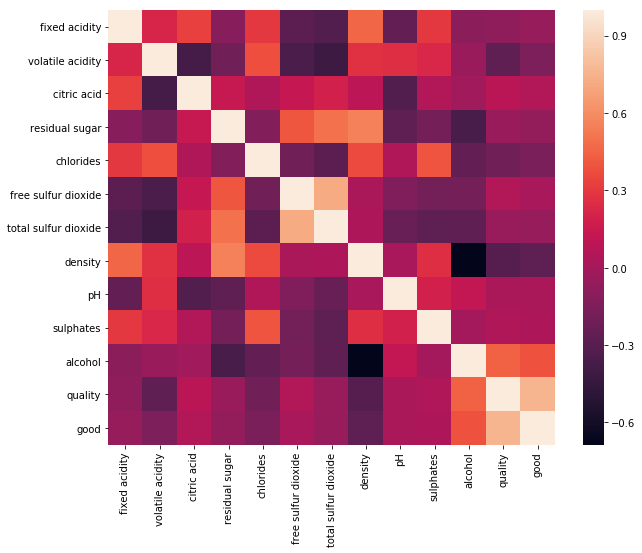

In [11]:
plt.figure(figsize=(10,8))
corr = a.corr()
sns.heatmap(corr)

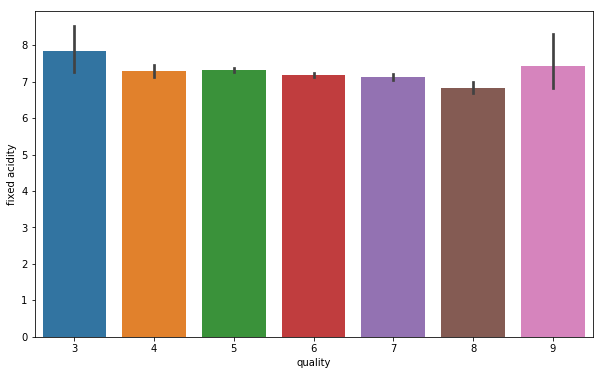

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = a)

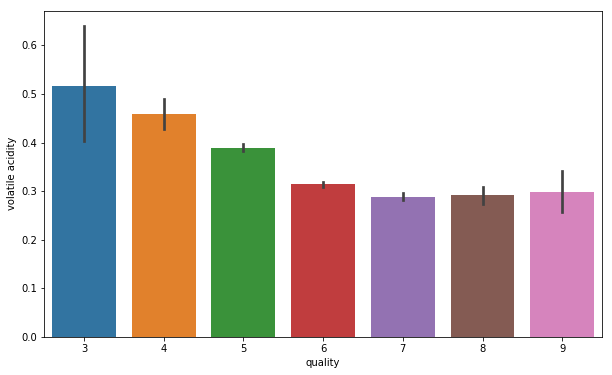

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = a)

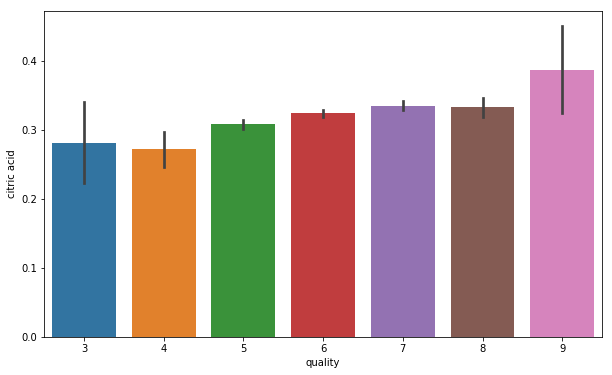

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data =a)

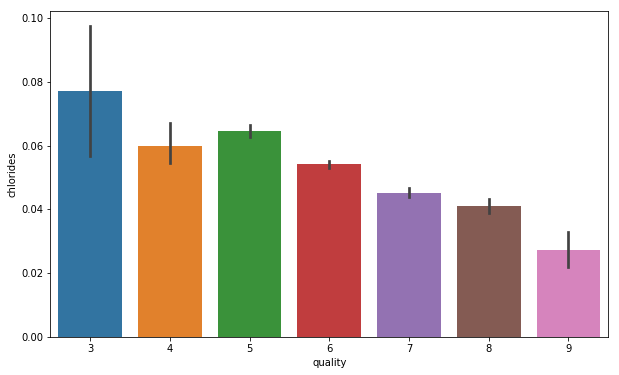

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = a)

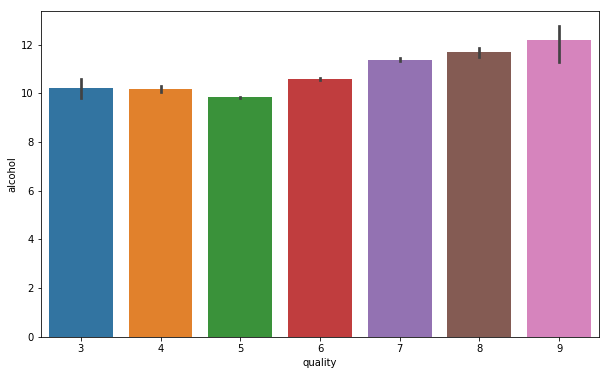

In [17]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = a)

In [18]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
def model_accuracy(y_true,pred):
    print("1) Accuracy score = ",metrics.accuracy_score(y_true,pred)*100,"%")
    print("2) Confusion matrix : \n",confusion_matrix(y_true,pred))
    print("3) Classification report : \n",classification_report(y_true,pred))

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=3)

## SVC

In [21]:
from sklearn.svm import SVC

In [23]:
b = SVC()
b.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
y_pred = b.predict(x_test)

In [25]:
model_accuracy(y_test,y_pred)

1) Accuracy score =  60.82051282051282 %
2) Confusion matrix : 
 [[  0   0   5   2   0   0   0]
 [  0   0  24  37   0   0   0]
 [  0   0 345 296   1   0   0]
 [  0   0 182 653  10   0   0]
 [  0   0  24 126 184   0   0]
 [  0   0   4  21  30   4   0]
 [  0   0   0   1   1   0   0]]
3) Classification report : 
              precision    recall  f1-score   support

          3       0.00      0.00      0.00         7
          4       0.00      0.00      0.00        61
          5       0.59      0.54      0.56       642
          6       0.57      0.77      0.66       845
          7       0.81      0.55      0.66       334
          8       1.00      0.07      0.13        59
          9       0.00      0.00      0.00         2

avg / total       0.61      0.61      0.59      1950



C:\Users\pawan\Documents\My Bluetooth\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Naive Byes Classifier

In [26]:
from sklearn.naive_bayes import BernoulliNB

In [27]:
c = BernoulliNB()

In [28]:
c.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [29]:
pred = c.predict(x_test)

In [30]:
model_accuracy(y_test,pred)

1) Accuracy score =  60.2051282051282 %
2) Confusion matrix : 
 [[  0   0   0   7   0   0   0]
 [  0   0   5  56   0   0   0]
 [  0   0  18 624   0   0   0]
 [  0   0  23 822   0   0   0]
 [  0   0   0   0 334   0   0]
 [  0   0   0   0  59   0   0]
 [  0   0   0   0   2   0   0]]
3) Classification report : 
              precision    recall  f1-score   support

          3       0.00      0.00      0.00         7
          4       0.00      0.00      0.00        61
          5       0.39      0.03      0.05       642
          6       0.54      0.97      0.70       845
          7       0.85      1.00      0.92       334
          8       0.00      0.00      0.00        59
          9       0.00      0.00      0.00         2

avg / total       0.51      0.60      0.48      1950



C:\Users\pawan\Documents\My Bluetooth\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
d= DecisionTreeClassifier()

In [33]:
d.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
pre = d.predict(x_test)

In [36]:
model_accuracy(y_test,pre)

1) Accuracy score =  70.2051282051282 %
2) Confusion matrix : 
 [[  0   2   5   0   0   0   0]
 [  1  19  25  16   0   0   0]
 [  1  34 406 201   0   0   0]
 [  1  26 198 620   0   0   0]
 [  0   0   0   0 289  43   2]
 [  0   0   0   0  24  35   0]
 [  0   0   0   0   0   2   0]]
3) Classification report : 
              precision    recall  f1-score   support

          3       0.00      0.00      0.00         7
          4       0.23      0.31      0.27        61
          5       0.64      0.63      0.64       642
          6       0.74      0.73      0.74       845
          7       0.92      0.87      0.89       334
          8       0.44      0.59      0.50        59
          9       0.00      0.00      0.00         2

avg / total       0.71      0.70      0.71      1950



## KNeighbour classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
e = KNeighborsClassifier()

In [40]:
e.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [41]:
pred = e.predict(x_test)

In [42]:
model_accuracy(y_test,pred)

1) Accuracy score =  51.48717948717949 %
2) Confusion matrix : 
 [[  0   0   5   1   1   0   0]
 [  0   6  29  25   1   0   0]
 [  2   8 358 261  11   2   0]
 [  0  10 288 508  35   4   0]
 [  0   0  59 145 127   3   0]
 [  1   0   8  27  18   5   0]
 [  0   0   0   1   1   0   0]]
3) Classification report : 
              precision    recall  f1-score   support

          3       0.00      0.00      0.00         7
          4       0.25      0.10      0.14        61
          5       0.48      0.56      0.52       642
          6       0.52      0.60      0.56       845
          7       0.65      0.38      0.48       334
          8       0.36      0.08      0.14        59
          9       0.00      0.00      0.00         2

avg / total       0.52      0.51      0.50      1950



C:\Users\pawan\Documents\My Bluetooth\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Random forest classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
f = RandomForestClassifier(n_jobs=8)

In [46]:
f.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=8,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
pred=f.predict(x_test)

In [48]:
model_accuracy(y_test,pred)

1) Accuracy score =  75.43589743589743 %
2) Confusion matrix : 
 [[  0   1   3   3   0   0   0]
 [  0  11  32  18   0   0   0]
 [  0   5 467 170   0   0   0]
 [  0   3 196 646   0   0   0]
 [  0   0   0   0 323  11   0]
 [  0   0   0   0  35  24   0]
 [  0   0   0   0   0   2   0]]
3) Classification report : 
              precision    recall  f1-score   support

          3       0.00      0.00      0.00         7
          4       0.55      0.18      0.27        61
          5       0.67      0.73      0.70       642
          6       0.77      0.76      0.77       845
          7       0.90      0.97      0.93       334
          8       0.65      0.41      0.50        59
          9       0.00      0.00      0.00         2

avg / total       0.75      0.75      0.75      1950



C:\Users\pawan\Documents\My Bluetooth\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Bagging Classifier

In [49]:
from sklearn import model_selection

In [50]:
from sklearn.ensemble import BaggingClassifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
kfold = model_selection.KFold(n_splits=10,random_state = 7)

In [53]:
g = DecisionTreeClassifier()

In [55]:
model1 = BaggingClassifier(base_estimator = g,n_estimators=100,random_state = 7)

In [56]:
results = model_selection.cross_val_score(model1,x,y,cv=kfold)

In [57]:
print(results.mean())

0.6798755481806329
